In [91]:
# libraries
from datascience import *
import numpy as np
import pandas as pd
import altair as alt
import altair_saver
from vega_datasets import data
import matplotlib.pyplot as plt
%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [92]:
demog_df = pd.read_csv('data/demographic_county.csv')
police_df = pd.read_csv('data/police_county.csv')

In [93]:
demog_table = Table().read_table('data/demographic_county.csv')
police_table = Table().read_table('data/police_county.csv')

In [94]:
no_na = police_df.dropna(subset=['race'])
race_codes = {
    'A': 'Asian', 'B': 'Black', 'W': 'White',
    'H': 'Hispanic', 'N': 'Native American', 'O': 'Other',
}
# recode age categories
policedata = no_na.replace({'race': race_codes})

states = alt.topo_feature(data.us_10m.url, feature='states')
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

points = alt.Chart(policedata).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.value(10),
    tooltip='name',
    color = 'race'
)

full_map = background + points
byrace = policedata.groupby('race').count()
byrace.reset_index(inplace=True)
chart = alt.Chart(byrace).mark_bar().encode(
    x= alt.X('race',sort=alt.EncodingSortField(field='name', order='descending'), title = "Victim's Race"),
    y=alt.Y('name',title = 'Total Fatal Shootings'),
    color = alt.Color('race',  scale=alt.Scale(scheme='paired'))
).properties(width=300,height=300)
map_counts =  full_map | chart 
map_counts

alt.HConcatChart(...)

In [95]:
def addState(county,state):
    combined = str(county)+str(state)
    return combined

In [96]:
police_state = police_table.with_column('County',police_table.apply(addState, 'County' , 'state')).to_df()


In [97]:
police_race_na = police_state.dropna(subset=['race'])
police_race_na = police_state.groupby(
    ['County','race']).agg({'id':'count'}).reset_index().rename(columns={'id':'Count'}).set_index(['County'])
police_counts = police_race_na.pivot(
               columns = 'race',
              values = 'Count').fillna(0)
police_counts['Total'] = police_counts.sum(axis=1)
police_counts

race                              A    B    H    N    O     W  nan  Total
County                                                                   
300 block of State Line RoadTN  0.0  0.0  0.0  0.0  0.0   0.0  1.0    1.0
AcadiaLA                        0.0  2.0  0.0  0.0  0.0   1.0  0.0    3.0
AdaID                           0.0  0.0  3.0  0.0  0.0  10.0  0.0   13.0
AdairOK                         0.0  0.0  0.0  0.0  0.0   2.0  0.0    2.0
AdamsCO                         1.0  7.0  9.0  0.0  0.0  20.0  6.0   43.0
...                             ...  ...  ...  ...  ...   ...  ...    ...
YorkPA                          0.0  2.0  0.0  0.0  0.0   4.0  1.0    7.0
YorkSC                          0.0  0.0  0.0  0.0  0.0   1.0  0.0    1.0
YorkVA                          0.0  1.0  0.0  0.0  0.0   0.0  0.0    1.0
YubaCA                          0.0  2.0  0.0  0.0  0.0   2.0  1.0    5.0
YumaAZ                          0.0  0.0  2.0  0.0  0.0   1.0  2.0    5.0

[1484 rows x 8 columns]

In [98]:
police_counts['A_Prop'] = police_counts.A/police_counts.Total
police_counts['B_Prop'] = police_counts.B/police_counts.Total
police_counts['H_Prop'] = police_counts.H/police_counts.Total
police_counts['N_Prop'] = police_counts.N/police_counts.Total
police_counts['O_Prop'] = police_counts.O/police_counts.Total
police_counts['W_Prop'] = police_counts.W/police_counts.Total
#police_counts


In [99]:
police_counts.mean()

race
A         0.070081
B         1.008760
H         0.708895
N         0.058625
O         0.031671
W         1.943396
nan       0.365903
Total     4.187332
A_Prop    0.012767
B_Prop    0.184432
H_Prop    0.087550
N_Prop    0.020636
O_Prop    0.004950
W_Prop    0.602764
dtype: float64

In [100]:
police_state_na = police_state.dropna(subset=['race'])
police_state_na = police_state.groupby(
    ['state','race']).agg({'id':'count'}).reset_index().rename(columns={'id':'Count'}).set_index(['state'])
police_state_counts = police_state_na.pivot(
               columns = 'race',
              values = 'Count').fillna(0)
police_state_counts['Total'] = police_state_counts.sum(axis=1)
#police_state_counts

In [101]:
police_state_counts['A_Prop'] = police_state_counts.A/police_state_counts.Total
police_state_counts['B_Prop'] = police_state_counts.B/police_state_counts.Total
police_state_counts['H_Prop'] = police_state_counts.H/police_state_counts.Total
police_state_counts['N_Prop'] = police_state_counts.N/police_state_counts.Total
police_state_counts['O_Prop'] = police_state_counts.O/police_state_counts.Total
police_state_counts['W_Prop'] = police_state_counts.W/police_state_counts.Total
police_state_counts.mean()

race
A           2.039216
B          29.352941
H          20.627451
N           1.705882
O           0.921569
W          56.549020
nan        10.647059
Total     121.843137
A_Prop      0.018010
B_Prop      0.234991
H_Prop      0.100166
N_Prop      0.034325
O_Prop      0.013286
W_Prop      0.529911
dtype: float64

In [102]:
demog_clean1 = demog_df.drop(columns=['Unnamed: 0', 'Income.Median Houseold Income',
                       'Income.Per Capita Income', 'Population.Population per Square Mile',
                      'Age.Percent 65 and Older','Age.Percent Under 18 Years', 'Age.Percent Under 5 Years',
                      "Education.Bachelor's Degree or Higher","Education.High School or Higher",
                      'Income.Persons Below Poverty Level','Ethnicities.White Alone'])
#demog_clean1['Other'] = demog_clean1.
demog_clean2 = demog_clean1.rename(columns = {'Ethnicities.American Indian and Alaska Native Alone' : 'Native_American',
                              'Ethnicities.Asian Alone':'Asian' , 'Ethnicities.Black Alone':'Black',
                              'Ethnicities.Hispanic or Latino':'Hispanic',
                               'Ethnicities.Native Hawaiian and Other Pacific Islander Alone' :'Other',
                              'Ethnicities.Two or More Races':'Mixed','Ethnicities.White Alone, not Hispanic or Latino':'White',
                              'Population.2014 Population':'Population'})
demog_clean2

County State  Native_American  Asian  Black  Hispanic  Other  Mixed  \
0        Autauga    AL              0.5    1.1   18.7       2.7    0.1    1.8   
1        Baldwin    AL              0.7    0.9    9.6       4.6    0.1    1.6   
2        Barbour    AL              0.6    0.5   47.6       4.5    0.2    0.9   
3           Bibb    AL              0.4    0.2   22.1       2.1    0.1    0.9   
4         Blount    AL              0.6    0.3    1.8       8.7    0.1    1.2   
...          ...   ...              ...    ...    ...       ...    ...    ...   
3138  Sweetwater    WY              1.3    0.9    1.5      15.8    0.2    1.8   
3139       Teton    WY              1.0    1.3    1.2      15.2    0.1    1.5   
3140       Uinta    WY              1.2    0.5    0.9       9.2    0.2    1.8   
3141    Washakie    WY              1.7    0.7    0.8      13.9    0.1    1.8   
3142      Weston    WY              1.7    0.4    0.7       4.2    0.0    2.2   

      White  Population  
0      75.6       55395  
1      83.0      200111  
2      46.6       26887  
3      74.5       22506  
4      87.8       57719  
...     ...         ...  
3138   79.7       45010  
3139   80.9       22930  
3140   87.3       20904  
3141   82.7        8322  
3142   91.5        7201  

[3143 rows x 10 columns]

In [103]:

demog_clean2['A_count'] = demog_clean2.Asian/100.0 * demog_clean2.Population
demog_clean2['B_count'] = demog_clean2.Black/100.0 * demog_clean2.Population
demog_clean2['H_count'] = demog_clean2.Hispanic/100.0 * demog_clean2.Population
demog_clean2['N_count'] = demog_clean2.Native_American/100.0 * demog_clean2.Population
demog_clean2['O_count'] = demog_clean2.Other/100.0 * demog_clean2.Population
demog_clean2['W_count'] = demog_clean2.White/100.0 * demog_clean2.Population
demog_clean3 = demog_clean2.drop(columns = ['Native_American','Asian',
                                           'Black','Hispanic', 'Other','Mixed', 'White','Population']).set_index(['County','State'])
demog_clean3['Total'] = demog_clean3.sum(axis=1)
demog_clean4 = demog_clean3.copy()

In [104]:
demog_clean3['A_Prop'] = demog_clean3.A_count/demog_clean3.Total
demog_clean3['B_Prop'] = demog_clean3.B_count/demog_clean3.Total
demog_clean3['H_Prop'] = demog_clean3.H_count/demog_clean3.Total
demog_clean3['N_Prop'] = demog_clean3.N_count/demog_clean3.Total
demog_clean3['O_Prop'] = demog_clean3.O_count/demog_clean3.Total
demog_clean3['W_Prop'] = demog_clean3.W_count/demog_clean3.Total
demog_props = pd.DataFrame(demog_clean3.mean()[7:]).rename(columns = {0:'Prop'})
demog_props
demog_clean3.mean()

A_count      5519.203487
B_count     13414.945787
H_count     17622.276172
N_count      1261.250008
O_count       234.903438
W_count     62955.035298
Total      101007.614191
A_Prop          0.014229
B_Prop          0.092829
H_Prop          0.090001
N_Prop          0.022938
O_Prop          0.001290
W_Prop          0.778713
dtype: float64

In [105]:
shooting_props = pd.DataFrame(police_counts.mean()[8:])

In [106]:
shooting_props['Demog_Proportions'] = demog_props.Prop
proportion_cleaned = shooting_props.rename(columns = {0:'Shooting_Proportions'}).rename(index= {'A_Prop':'Asian',
                                                                                               'B_Prop':'Black',
                                                                                               'H_Prop':'Hispanic',
                                                                                               'N_Prop':'Native',
                                                                                               'O_Prop':'Other',
                                                                                               'W_Prop':'White'}).reset_index()

In [107]:
proportion_cleaned1= proportion_cleaned.rename(columns={'Shooting_Proportions':'Fatal Shooting',
                                                           'Demog_Proportions':'Demographic'})
melted_props = pd.melt(proportion_cleaned1, id_vars=['race'], var_name=['Type'], value_name='Proportion')
prop_chart = alt.Chart(melted_props, title ="County Average Proportions" ).mark_bar().encode(
    x= alt.X('Type:O'),
    y= alt.Y('Proportion:Q'),
    color= alt.Color('Type:N',title = 'Proportion Type'),
    column= alt.Column('race:O', title = 'Race',sort=alt.EncodingSortField(field='Proportion', order='descending'))
)

In [108]:
demog_clean5 = demog_clean4.groupby(
    ['State']).sum()
demog_clean5['A_Prop'] = demog_clean5.A_count/demog_clean5.Total
demog_clean5['B_Prop'] = demog_clean5.B_count/demog_clean5.Total
demog_clean5['H_Prop'] = demog_clean5.H_count/demog_clean5.Total
demog_clean5['N_Prop'] = demog_clean5.N_count/demog_clean5.Total
demog_clean5['O_Prop'] = demog_clean5.O_count/demog_clean5.Total
demog_clean5['W_Prop'] = demog_clean5.W_count/demog_clean5.Total
demog_clean5.mean()[7:]
demog_props2 = pd.DataFrame(demog_clean5.mean()[7:]).rename(columns = {0:'Prop'})

In [109]:
shooting_state_props = pd.DataFrame(police_state_counts.mean()[8:])
shooting_state_props['Demog_Proportions'] = demog_props2.Prop
proportion_state_cleaned = shooting_state_props.rename(columns = {0:'Shooting_Proportions'}).rename(index= {'A_Prop':'Asian',
                                                                                               'B_Prop':'Black',
                                                                                               'H_Prop':'Hispanic',
                                                                                               'N_Prop':'Native',
                                                                                               'O_Prop':'Other',
                                                                                               'W_Prop':'White'}).reset_index()
proportion_state_cleaned

race  Shooting_Proportions  Demog_Proportions
0     Asian              0.018010           0.043240
1     Black              0.234991           0.117339
2  Hispanic              0.100166           0.114644
3    Native              0.034325           0.019753
4     Other              0.013286           0.004191
5     White              0.529911           0.700833

In [110]:
proportion_cleaned2= proportion_state_cleaned.rename(columns={'Shooting_Proportions':'Fatal Shooting',
                                                           'Demog_Proportions':'Demographic'})
melted_props2 = pd.melt(proportion_cleaned2, id_vars=['race'], var_name=['Type'], value_name='Proportion')
prop_chart2 = alt.Chart(melted_props2, title= "State Average Proportions").mark_bar().encode(
    x= alt.X('Type:O'),
    y= alt.Y('Proportion:Q'),
    color= alt.Color('Type:N',title = 'Proportion Type'),
    column= alt.Column('race:O', title = 'Race',sort=alt.EncodingSortField(field='Proportion', order='descending'))
)
complete_prop_chart = prop_chart | prop_chart2
complete_prop_chart

alt.HConcatChart(...)

In [111]:
proportion_table = Table().from_df(proportion_cleaned)
prop_table1 = proportion_table.with_column('Difference', abs(proportion_table.column('Demog_Proportions') - proportion_table.column('Shooting_Proportions')))
observed_TVD = sum(prop_table1.column('Difference'))/2 
observed_TVD

0.13871424058273696

In [112]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2
def one_simulated_tvd():
    sample_distribution = sample_proportions(101008,proportion_table.column('Demog_Proportions'))
    return total_variation_distance(sample_distribution, proportion_table.column('Demog_Proportions'))
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

In [113]:
tvd_p_value = np.count_nonzero(tvds >= observed_TVD) / len(tvds) #SOLUTION
tvd_p_value

0.0

In [114]:
def statistic(actual_prop):
    return abs(0.0928288 - actual_prop)
observed_stat =  statistic(0.184432)
observed_stat

0.09160320000000001

In [115]:
def simulation_and_statistic():
    simulation_proportion_correct = sample_proportions(101008,proportion_table.column('Demog_Proportions')).item(1)
    one_statistic = statistic(simulation_proportion_correct)
    return one_statistic
simulation_and_statistic()

0.000559842483763659

In [116]:
num_repetitions = 5000
simulated_statistics = make_array() # SOLUTION
# BEGIN SOLUTION NO PROMPT
for i in np.arange(num_repetitions):
    one_statistic = simulation_and_statistic()
    simulated_statistics = np.append(simulated_statistics, one_statistic)

C:\Users\Jordan\anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


Text(0.5, 1.0, 'Simulated Total Variation Distances between Proportions')

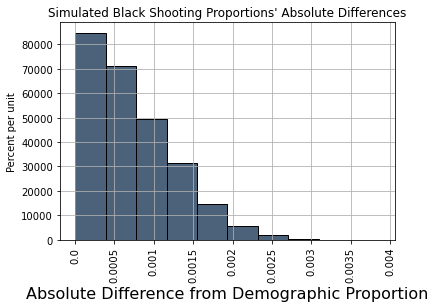

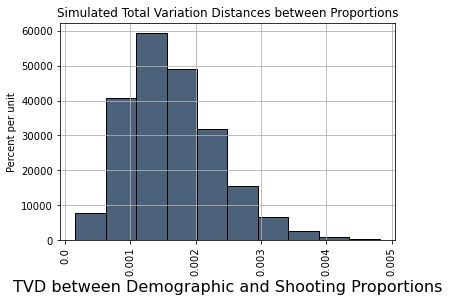

In [117]:

black_prop = Table().with_column('Absolute Difference from Demographic Proportion', simulated_statistics)
black_prop.hist()
plt.grid()
plt.title("Simulated Black Shooting Proportions' Absolute Differences")

tvd = Table().with_column('TVD between Demographic and Shooting Proportions', tvds)
tvd.hist(density=True)
plt.grid()
plt.title('Simulated Total Variation Distances between Proportions')
#The total variation distance between the panels and the population was 0.14, 
#which is far out in the tail of the histogram above. 
#It does not look at all like a typical distance between a random sample and the eligible population.

In [118]:
framingham_p_value = np.count_nonzero(simulated_statistics >= observed_stat) / len(simulated_statistics) #SOLUTION
framingham_p_value

0.0

In [119]:
black_prop_df = black_prop.to_df()
tvd_df = tvd.to_df()

In [120]:
black_prop_df

Absolute Difference from Demographic Proportion
0                                            0.001133
1                                            0.000826
2                                            0.000153
3                                            0.001045
4                                            0.001658
...                                               ...
4995                                         0.000085
4996                                         0.000232
4997                                         0.000925
4998                                         0.000094
4999                                         0.000222

[5000 rows x 1 columns]

In [121]:
tvd_chart = alt.Chart(tvd_df , title = "Total Variation Distances of Simulated Victim's Race Proportions").transform_density(
    'TVD between Demographic and Shooting Proportions',
    as_=['TVD between Demographic and Shooting Proportions', 'Density'],
).mark_area(color='blue',opacity=0.3).encode(
    x="TVD between Demographic and Shooting Proportions:Q",
    y='Density:Q',
)
black_chart = alt.Chart(black_prop_df,  title = "Simulated Black Victim Proportions' Absolute Differences").transform_density(
    'Absolute Difference from Demographic Proportion',
    as_=['Absolute Difference from Demographic Proportion', 'Density'],
).mark_area(color='red',opacity=0.3).encode(
    x="Absolute Difference from Demographic Proportion:Q",
    y='Density:Q',
)
p_value_charts = tvd_chart | black_chart

In [122]:
map_counts

alt.HConcatChart(...)

In [123]:
complete_prop_chart

alt.HConcatChart(...)

In [124]:
p_value_charts

alt.HConcatChart(...)

In [125]:
print("Observed Absolute Difference:" , observed_stat)
print("Observed TVD:" , observed_TVD)
#Both P-values = 0
proportion_table

Observed Absolute Difference: 0.09160320000000001
Observed TVD: 0.13871424058273696


race     | Shooting_Proportions | Demog_Proportions
Asian    | 0.012767             | 0.0142291
Black    | 0.184432             | 0.0928288
Hispanic | 0.0875499            | 0.0900015
Native   | 0.0206357            | 0.0229378
Other    | 0.00494966           | 0.0012897
White    | 0.602764             | 0.778713

In [126]:
police_state

Unnamed: 0    id                    name        date   manner_of_death  \
0              0     3              Tim Elliot  2015-01-02              shot   
1              1     4        Lewis Lee Lembke  2015-01-02              shot   
2              2     5      John Paul Quintero  2015-01-03  shot and Tasered   
3              3     8         Matthew Hoffman  2015-01-04              shot   
4              4     9       Michael Rodriguez  2015-01-04              shot   
...          ...   ...                     ...         ...               ...   
6209        6209  6767           Daunte Wright  2021-04-11              shot   
6210        6210  6768  Pier Alexander Shelton  2021-04-12              shot   
6211        6211  6778              Peyton Ham  2021-04-13              shot   
6212        6212  6779              Jacob Wood  2021-04-14              shot   
6213        6213  6780          Marcelo Garcia  2021-04-14  shot and Tasered   

               armed   age gender race           County state  \
0                gun  53.0      M    A          MasonWA    WA   
1                gun  47.0      M    W     WashingtonOR    OR   
2            unarmed  23.0      M    H       SedgwickKS    KS   
3         toy weapon  32.0      M    W  San FranciscoCA    CA   
4           nail gun  39.0      M    H           WeldCO    CO   
...              ...   ...    ...  ...              ...   ...   
6209    undetermined  20.0      M    B       HennepinMN    MN   
6210             gun  28.0      M    B       HaralsonGA    GA   
6211           knife  16.0      M    W   Saint Mary'sMD    MD   
6212  unknown weapon  28.0      M  nan      AroostookME    ME   
6213           knife  46.0      M    H         HarrisTX    TX   

      signs_of_mental_illness  threat_level         flee  body_camera  \
0                        True        attack  Not fleeing        False   
1                       False        attack  Not fleeing        False   
2                       False         other  Not fleeing        False   
3                        True        attack  Not fleeing        False   
4                       False        attack  Not fleeing        False   
...                       ...           ...          ...          ...   
6209                    False         other          nan         True   
6210                    False        attack          Car        False   
6211                    False        attack  Not fleeing        False   
6212                    False  undetermined          nan        False   
6213                     True         other          nan        False   

      longitude  latitude  is_geocoding_exact  
0      -123.122    47.247                True  
1      -122.892    45.487                True  
2       -97.281    37.695                True  
3      -122.422    37.763                True  
4      -104.692    40.384                True  
...         ...       ...                 ...  
6209    -93.341    45.070                True  
6210    -84.992    33.628                True  
6211    -76.634    38.300                True  
6212    -67.867    46.526                True  
6213    -95.157    29.812                True  

[6214 rows x 18 columns]

In [127]:
police_age = police_state.dropna(subset=['race']).dropna(subset=['age'])

In [128]:
bins= [0,18,25,45,65,110]
labels = ['0-17','18-24','25-44','45-64','65+']
police_age['AgeCohort'] = pd.cut(police_age['age'], bins=bins, labels=labels, right=False)
police_cleaned = police_age.drop(columns=['Unnamed: 0', 'date',
                        'name',
                      'manner_of_death','armed',
                      "signs_of_mental_illness","threat_level",
                      'flee','body_camera', 'longitude', 'latitude','is_geocoding_exact'])
police_cleaned = police_cleaned[police_cleaned.race != 'nan']

In [129]:
police_cleaned2 = police_cleaned.groupby(
    ['race','AgeCohort']).agg({'id':'count'}).reset_index().rename(columns={'id':'Count'}).set_index(['AgeCohort'])
police_cleaned2

race  Count
AgeCohort            
0-17         A      4
18-24        A     12
25-44        A     57
45-64        A     27
65+          A      0
0-17         B     40
18-24        B    351
25-44        B    849
45-64        B    209
65+          B     21
0-17         H     27
18-24        H    187
25-44        H    643
45-64        H    154
65+          H     13
0-17         N      1
18-24        N     15
25-44        N     63
45-64        N      7
65+          N      0
0-17         O      0
18-24        O      9
25-44        O     29
45-64        O      8
65+          O      0
0-17         W     36
18-24        W    265
25-44        W   1538
45-64        W    881
65+          W    120

In [130]:
police_cleaned3 = police_cleaned2.pivot_table(
        values='Count', 
        index=['AgeCohort'], 
        columns='race', 
        aggfunc=np.sum)
#police_cleaned3.columns = police_cleaned3.columns.add_categories('Total')
police_cleaned3

race        A    B    H   N   O     W
AgeCohort                            
0-17        4   40   27   1   0    36
18-24      12  351  187  15   9   265
25-44      57  849  643  63  29  1538
45-64      27  209  154   7   8   881
65+         0   21   13   0   0   120

In [131]:
#police_cleaned3.columns = police_cleaned3.columns.add_categories('0-17_Prop')
#police_cleaned3.columns = police_cleaned3.columns.add_categories('18-24_Prop')
#police_cleaned3.columns = police_cleaned3.columns.add_categories('25-44_Prop')
#police_cleaned3.columns = police_cleaned3.columns.add_categories('45-64_Prop')
#police_cleaned3.columns = police_cleaned3.columns.add_categories('65+_Prop')

In [132]:
#police_cleaned3['0-17_Prop'] = police_cleaned3['0-17']/police_cleaned3.Total
#police_cleaned3['18-24_Prop'] = police_cleaned3['18-24']/police_cleaned3.Total
#police_cleaned3['25-44_Prop'] = police_cleaned3['25-44']/police_cleaned3.Total
#police_cleaned3['45-64_Prop'] = police_cleaned3['45-64']/police_cleaned3.Total
#police_cleaned3['65+_Prop'] = police_cleaned3['65+']/police_cleaned3.Total
#police_cleaned4 = police_cleaned3.fillna(0)
#police_cleaned4

In [133]:
police_cleaned3.sum(axis=0)

race
A     100
B    1470
H    1024
N      86
O      46
W    2840
dtype: int64

In [134]:

police_cleaned3['A_Prop'] = police_cleaned3['A']/police_cleaned3.sum(axis=0)[0]
police_cleaned3['B_Prop'] = police_cleaned3['B']/police_cleaned3.sum(axis=0)[1]
police_cleaned3['H_Prop'] = police_cleaned3['H']/police_cleaned3.sum(axis=0)[2]
police_cleaned3['N_Prop'] = police_cleaned3['N']/police_cleaned3.sum(axis=0)[3]
police_cleaned3['O_Prop'] = police_cleaned3['O']/police_cleaned3.sum(axis=0)[4]
police_cleaned3['W_Prop'] = police_cleaned3['W']/police_cleaned3.sum(axis=0)[5]
police_cleaned4 = police_cleaned3.fillna(0)
police_cleaned4

race        A    B    H   N   O     W  A_Prop    B_Prop    H_Prop    N_Prop  \
AgeCohort                                                                     
0-17        4   40   27   1   0    36    0.04  0.027211  0.026367  0.011628   
18-24      12  351  187  15   9   265    0.12  0.238776  0.182617  0.174419   
25-44      57  849  643  63  29  1538    0.57  0.577551  0.627930  0.732558   
45-64      27  209  154   7   8   881    0.27  0.142177  0.150391  0.081395   
65+         0   21   13   0   0   120    0.00  0.014286  0.012695  0.000000   

race         O_Prop    W_Prop  
AgeCohort                      
0-17       0.000000  0.012676  
18-24      0.195652  0.093310  
25-44      0.630435  0.541549  
45-64      0.173913  0.310211  
65+        0.000000  0.042254

In [135]:
#police_cleaned4.columns = police_cleaned4.columns.add_categories('state')
#police_cleaned4.columns = police_cleaned4.columns.add_categories('race')

In [136]:
#police_cleaned5 = police_cleaned4.reset_index().groupby('Age').mean()
ageRace_state_average_proport_df = police_cleaned4.drop(columns = ['A','B','H','N','O','W'])
ageRace_state_average_proport_df 


race       A_Prop    B_Prop    H_Prop    N_Prop    O_Prop    W_Prop
AgeCohort                                                          
0-17         0.04  0.027211  0.026367  0.011628  0.000000  0.012676
18-24        0.12  0.238776  0.182617  0.174419  0.195652  0.093310
25-44        0.57  0.577551  0.627930  0.732558  0.630435  0.541549
45-64        0.27  0.142177  0.150391  0.081395  0.173913  0.310211
65+          0.00  0.014286  0.012695  0.000000  0.000000  0.042254

In [137]:
police_cleaned
police_age = police_cleaned.groupby(
    ['state','AgeCohort']).agg({'id':'count'}).reset_index().rename(columns={'id':'Count'}).set_index(['state'])

police_age2 = police_age.pivot_table(
        values='Count', 
        index=['state'], 
        columns='AgeCohort', 
        aggfunc=np.sum)
police_age2.columns = police_age2.columns.add_categories('Total')
police_age2['Total'] = police_age2.sum(axis=1)


In [138]:
police_age2.columns = police_age2.columns.add_categories('0-17_Prop')
police_age2.columns = police_age2.columns.add_categories('18-24_Prop')
police_age2.columns = police_age2.columns.add_categories('25-44_Prop')
police_age2.columns = police_age2.columns.add_categories('45-64_Prop')
police_age2.columns = police_age2.columns.add_categories('65+_Prop')

In [139]:
police_age2['0-17_Prop'] = police_age2['0-17']/police_age2.Total
police_age2['18-24_Prop'] = police_age2['18-24']/police_age2.Total
police_age2['25-44_Prop'] = police_age2['25-44']/police_age2.Total
police_age2['45-64_Prop'] = police_age2['45-64']/police_age2.Total
police_age2['65+_Prop'] = police_age2['65+']/police_age2.Total
ageCohort_proportion_state = police_age2.drop(columns=['0-17','18-24','25-44','45-64','65+','Total'])
ageCohort_proportion_state.mean()

AgeCohort
0-17_Prop     0.016969
18-24_Prop    0.137684
25-44_Prop    0.584475
45-64_Prop    0.230999
65+_Prop      0.029874
dtype: float64

In [140]:

ageRace_state_average_proport_df['All Victims'] = ageCohort_proportion_state.mean().to_list()
ageRace_state_average_proport_df['Population'] = [.24,.099,.266,.264,.13]
ageRace_state_average_proport_df

race       A_Prop    B_Prop    H_Prop    N_Prop    O_Prop    W_Prop  \
AgeCohort                                                             
0-17         0.04  0.027211  0.026367  0.011628  0.000000  0.012676   
18-24        0.12  0.238776  0.182617  0.174419  0.195652  0.093310   
25-44        0.57  0.577551  0.627930  0.732558  0.630435  0.541549   
45-64        0.27  0.142177  0.150391  0.081395  0.173913  0.310211   
65+          0.00  0.014286  0.012695  0.000000  0.000000  0.042254   

race       All Victims  Population  
AgeCohort                           
0-17          0.016969       0.240  
18-24         0.137684       0.099  
25-44         0.584475       0.266  
45-64         0.230999       0.264  
65+           0.029874       0.130

In [141]:
ageRace_state_average_proport = ageRace_state_average_proport_df.rename(columns= {
                                                  'A_Prop':'Asian Victims',
                                                  'B_Prop':'Black Victims',
                                                  'H_Prop':'Hispanic Victims',
                                                  'N_Prop':'Native Victims',
                                                  'O_Prop':'Other Victims',
                                                  'W_Prop':'White Victims'
                                                 })
ageRace_state_average_proport= ageRace_state_average_proport.reset_index()
ageRace_state_average_proport

race AgeCohort  Asian Victims  Black Victims  Hispanic Victims  \
0         0-17           0.04       0.027211          0.026367   
1        18-24           0.12       0.238776          0.182617   
2        25-44           0.57       0.577551          0.627930   
3        45-64           0.27       0.142177          0.150391   
4          65+           0.00       0.014286          0.012695   

race  Native Victims  Other Victims  White Victims  All Victims  Population  
0           0.011628       0.000000       0.012676     0.016969       0.240  
1           0.174419       0.195652       0.093310     0.137684       0.099  
2           0.732558       0.630435       0.541549     0.584475       0.266  
3           0.081395       0.173913       0.310211     0.230999       0.264  
4           0.000000       0.000000       0.042254     0.029874       0.130

In [142]:
ageRace_state_average_proport2 = ageRace_state_average_proport.melt(id_vars=["AgeCohort"], 
        var_name="Group", 
        value_name="Value")
ageRace_state_average_proport2['cohort_order'] = ageRace_state_average_proport2['AgeCohort'].cat.codes
ageRace_state_average_proport2

AgeCohort             Group     Value  cohort_order
0       0-17     Asian Victims  0.040000             0
1      18-24     Asian Victims  0.120000             1
2      25-44     Asian Victims  0.570000             2
3      45-64     Asian Victims  0.270000             3
4        65+     Asian Victims  0.000000             4
5       0-17     Black Victims  0.027211             0
6      18-24     Black Victims  0.238776             1
7      25-44     Black Victims  0.577551             2
8      45-64     Black Victims  0.142177             3
9        65+     Black Victims  0.014286             4
10      0-17  Hispanic Victims  0.026367             0
11     18-24  Hispanic Victims  0.182617             1
12     25-44  Hispanic Victims  0.627930             2
13     45-64  Hispanic Victims  0.150391             3
14       65+  Hispanic Victims  0.012695             4
15      0-17    Native Victims  0.011628             0
16     18-24    Native Victims  0.174419             1
17     25-44    Native Victims  0.732558             2
18     45-64    Native Victims  0.081395             3
19       65+    Native Victims  0.000000             4
20      0-17     Other Victims  0.000000             0
21     18-24     Other Victims  0.195652             1
22     25-44     Other Victims  0.630435             2
23     45-64     Other Victims  0.173913             3
24       65+     Other Victims  0.000000             4
25      0-17     White Victims  0.012676             0
26     18-24     White Victims  0.093310             1
27     25-44     White Victims  0.541549             2
28     45-64     White Victims  0.310211             3
29       65+     White Victims  0.042254             4
30      0-17       All Victims  0.016969             0
31     18-24       All Victims  0.137684             1
32     25-44       All Victims  0.584475             2
33     45-64       All Victims  0.230999             3
34       65+       All Victims  0.029874             4
35      0-17        Population  0.240000             0
36     18-24        Population  0.099000             1
37     25-44        Population  0.266000             2
38     45-64        Population  0.264000             3
39       65+        Population  0.130000             4

In [143]:
fig_1 = alt.Chart(ageRace_state_average_proport2).mark_line(point = True).encode(
    x = alt.X('AgeCohort:N', 
              title = 'Age',
              sort = alt.EncodingSortField(field = 'cohort_order', 
                                           order = 'ascending')
             ),
    y = alt.Y('Value:Q', 
              title = 'Group State Proportion',scale = alt.Scale(type = 'linear')),             
    color = alt.Color('Group:N',title = 'Group')
)


In [144]:
#https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf used for population age proportions

In [145]:
police_test = police_cleaned.groupby(
    ['race','AgeCohort']).agg({'id':'count'}).reset_index().rename(columns={'id':'Count'}).set_index(['race'])
police_test2 = police_test.pivot_table(
        values='Count', 
        index=['race'], 
        columns='AgeCohort', 
        aggfunc=np.sum)
police_test2.columns = police_test2.columns.add_categories('0-17_Prop')
police_test2.columns = police_test2.columns.add_categories('18-24_Prop')
police_test2.columns = police_test2.columns.add_categories('25-44_Prop')
police_test2.columns = police_test2.columns.add_categories('45-64_Prop')
police_test2.columns = police_test2.columns.add_categories('65+_Prop')
police_test2['0-17_Prop'] = police_test2['0-17']/police_test2.sum(axis=0)[0]
police_test2['18-24_Prop'] = police_test2['18-24']/police_test2.sum(axis=0)[1]
police_test2['25-44_Prop'] = police_test2['25-44']/police_test2.sum(axis=0)[2]
police_test2['45-64_Prop'] = police_test2['45-64']/police_test2.sum(axis=0)[3]
police_test2['65+_Prop'] = police_test2['65+']/police_test2.sum(axis=0)[4]
police_test3 = police_test2.drop(columns = ['0-17','18-24','25-44','45-64','65+'])
police_test3 = police_test3.rename(columns= {'0-17_Prop':'0-17',
                                                  '18-24_Prop':'18-24',
                                                  '25-44_Prop':'25-44',
                                                  '45-64_Prop':'45-64',
                                                  '65+_Prop':'65+'
                                                 })
police_test3 = police_test3.rename(index = {'A':'Asian Victims',
                                                  'B':'Black Victims',
                                                  'H':'Hispanic Victims',
                                                  'N':'Native Victims',
                                                  'O':'Other Victims',
                                                  'W':'White Victims'}).reset_index()
police_test3

AgeCohort              race      0-17     18-24     25-44     45-64       65+
0             Asian Victims  0.037037  0.014303  0.017930  0.020995  0.000000
1             Black Victims  0.370370  0.418355  0.267065  0.162519  0.136364
2          Hispanic Victims  0.250000  0.222884  0.202265  0.119751  0.084416
3            Native Victims  0.009259  0.017878  0.019818  0.005443  0.000000
4             Other Victims  0.000000  0.010727  0.009122  0.006221  0.000000
5             White Victims  0.333333  0.315852  0.483800  0.685070  0.779221

In [146]:
data = {'race':['All','Population'],'0-17':[0.016969, .24],'18-24':[0.137684,.099], '25-44':[0.584475,.266],
        '45-64':[0.230999,.264], '65+': [0.029874,.13] }
police_test4 = police_test3.append(pd.DataFrame(data))
police_test4

AgeCohort              race      0-17     18-24     25-44     45-64       65+
0             Asian Victims  0.037037  0.014303  0.017930  0.020995  0.000000
1             Black Victims  0.370370  0.418355  0.267065  0.162519  0.136364
2          Hispanic Victims  0.250000  0.222884  0.202265  0.119751  0.084416
3            Native Victims  0.009259  0.017878  0.019818  0.005443  0.000000
4             Other Victims  0.000000  0.010727  0.009122  0.006221  0.000000
5             White Victims  0.333333  0.315852  0.483800  0.685070  0.779221
0                       All  0.016969  0.137684  0.584475  0.230999  0.029874
1                Population  0.240000  0.099000  0.266000  0.264000  0.130000

In [147]:
police_test5 = police_test4.melt(id_vars=["race"], 
        var_name="AgeCohort", 
        value_name="Value")
fig_2 = alt.Chart(police_test5).mark_line(point = True).encode(
    x = alt.X('race:N', 
              title = 'Group'
             ),
    y = alt.Y('Value:Q', 
              title = 'Group State Proportion',scale = alt.Scale(type = 'sqrt')),             
    color = alt.Color('AgeCohort:N',title = 'Age Group')
)
fig_2.properties(height = 500,width = 500) 

alt.Chart(...)

In [148]:
fig_1.properties(height = 500,width = 500)

alt.Chart(...)

In [149]:
police_test6 = police_test4.reset_index().drop(index=[6,7],columns = 'index')
police_test6 = police_test6.melt(id_vars=["race"], 
        var_name="AgeCohort", 
     value_name="Value")


In [150]:
bars = alt.Chart(ageRace_state_average_proport2).mark_bar().encode(
    x=alt.X('Value:Q', stack='zero'),
    y=alt.Y('Group:N', sort=['White Victims', 'Black Victims', 'Hispanic Victims',
                                          'Asian Victims','Native Victims','Other Victims','All Victims',
                                          'Population']),
    color=alt.Color('AgeCohort:N'),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'Value',
      sort='descending')
    )

text = alt.Chart(ageRace_state_average_proport2).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('Value:Q', stack='zero'),
    y=alt.Y('Group:N',sort=['White Victims', 'Black Victims', 'Hispanic Victims',
                                          'Asian Victims','Native Victims','Other Victims','All Victims',
                                          'Population']),
    detail='AgeCohort:N',
    text=alt.Text('Value', format='.0%'),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'Value',
      sort='descending'
    )
)

(bars+text).properties(height = 400,width = 700)

alt.LayerChart(...)

In [151]:
police_gender = police_cleaned.groupby(
    ['state','race','gender']).agg({'id':'count'}).reset_index().rename(columns={'id':'Count'}).set_index(['state','gender'])
police_gender2 = police_gender.pivot_table(
        values='Count', 
        index=['state','gender'], 
        columns='race', 
        aggfunc=np.sum)
police_gender2['Total'] = police_gender2.sum(axis=1)
police_gender2 = police_gender2.fillna(0)
police_gender2['A_Prop'] = police_gender2['A']/police_gender2.Total
police_gender2['B_Prop'] = police_gender2['B']/police_gender2.Total
police_gender2['H_Prop'] = police_gender2['H']/police_gender2.Total
police_gender2['N_Prop'] = police_gender2['N']/police_gender2.Total
police_gender2['O_Prop'] = police_gender2['O']/police_gender2.Total
police_gender2['W_Prop'] = police_gender2['W']/police_gender2.Total
police_gender2.query("gender == 'F'")

race            A    B     H    N    O     W  Total   A_Prop    B_Prop  \
state gender                                                             
AK    F       0.0  0.0   0.0  1.0  0.0   1.0    2.0  0.00000  0.000000   
AL    F       0.0  1.0   0.0  0.0  0.0   7.0    8.0  0.00000  0.125000   
AZ    F       0.0  2.0   7.0  2.0  0.0   7.0   18.0  0.00000  0.111111   
CA    F       1.0  8.0  12.0  0.0  1.0  20.0   42.0  0.02381  0.190476   
CO    F       0.0  0.0   3.0  0.0  0.0   3.0    6.0  0.00000  0.000000   
DC    F       0.0  1.0   0.0  0.0  0.0   2.0    3.0  0.00000  0.333333   
DE    F       0.0  0.0   0.0  0.0  0.0   1.0    1.0  0.00000  0.000000   
FL    F       0.0  4.0   0.0  0.0  1.0  17.0   22.0  0.00000  0.181818   
GA    F       0.0  4.0   0.0  0.0  0.0  11.0   15.0  0.00000  0.266667   
HI    F       1.0  0.0   0.0  0.0  1.0   0.0    2.0  0.50000  0.000000   
IA    F       0.0  0.0   0.0  0.0  0.0   3.0    3.0  0.00000  0.000000   
ID    F       0.0  0.0   0.0  0.0  0.0   2.0    2.0  0.00000  0.000000   
IL    F       0.0  2.0   0.0  0.0  0.0   2.0    4.0  0.00000  0.500000   
IN    F       0.0  0.0   0.0  0.0  0.0   3.0    3.0  0.00000  0.000000   
KS    F       0.0  0.0   0.0  0.0  0.0   3.0    3.0  0.00000  0.000000   
KY    F       0.0  1.0   0.0  0.0  0.0   3.0    4.0  0.00000  0.250000   
LA    F       0.0  0.0   0.0  0.0  0.0   2.0    2.0  0.00000  0.000000   
MD    F       0.0  2.0   0.0  0.0  0.0   2.0    4.0  0.00000  0.500000   
ME    F       0.0  0.0   0.0  0.0  0.0   1.0    1.0  0.00000  0.000000   
MI    F       0.0  1.0   0.0  0.0  0.0   1.0    2.0  0.00000  0.500000   
MN    F       0.0  0.0   0.0  0.0  0.0   2.0    2.0  0.00000  0.000000   
MO    F       0.0  2.0   0.0  0.0  0.0   8.0   10.0  0.00000  0.200000   
MS    F       0.0  1.0   0.0  0.0  0.0   1.0    2.0  0.00000  0.500000   
MT    F       0.0  0.0   0.0  0.0  0.0   1.0    1.0  0.00000  0.000000   
NC    F       0.0  1.0   0.0  0.0  0.0   5.0    6.0  0.00000  0.166667   
NE    F       0.0  0.0   0.0  0.0  0.0   2.0    2.0  0.00000  0.000000   
NJ    F       0.0  2.0   0.0  0.0  0.0   0.0    2.0  0.00000  1.000000   
NM    F       0.0  0.0   3.0  0.0  0.0   3.0    6.0  0.00000  0.000000   
NV    F       0.0  0.0   1.0  0.0  0.0   2.0    3.0  0.00000  0.000000   
NY    F       0.0  3.0   0.0  0.0  0.0   1.0    4.0  0.00000  0.750000   
OH    F       0.0  1.0   0.0  0.0  0.0   5.0    6.0  0.00000  0.166667   
OK    F       0.0  1.0   0.0  0.0  0.0   3.0    4.0  0.00000  0.250000   
OR    F       0.0  0.0   0.0  0.0  0.0   2.0    2.0  0.00000  0.000000   
PA    F       0.0  1.0   0.0  0.0  0.0   2.0    3.0  0.00000  0.333333   
SC    F       0.0  1.0   0.0  0.0  0.0   4.0    5.0  0.00000  0.200000   
TN    F       0.0  2.0   0.0  0.0  0.0   5.0    7.0  0.00000  0.285714   
TX    F       0.0  4.0   5.0  0.0  0.0  22.0   31.0  0.00000  0.129032   
VA    F       0.0  4.0   0.0  0.0  0.0   2.0    6.0  0.00000  0.666667   
WA    F       0.0  1.0   0.0  2.0  0.0   3.0    6.0  0.00000  0.166667   
WI    F       0.0  0.0   0.0  0.0  0.0   1.0    1.0  0.00000  0.000000   
WV    F       1.0  0.0   0.0  0.0  0.0   1.0    2.0  0.50000  0.000000   
WY    F       0.0  0.0   0.0  0.0  0.0   1.0    1.0  0.00000  0.000000   

race            H_Prop    N_Prop    O_Prop    W_Prop  
state gender                                          
AK    F       0.000000  0.500000  0.000000  0.500000  
AL    F       0.000000  0.000000  0.000000  0.875000  
AZ    F       0.388889  0.111111  0.000000  0.388889  
CA    F       0.285714  0.000000  0.023810  0.476190  
CO    F       0.500000  0.000000  0.000000  0.500000  
DC    F       0.000000  0.000000  0.000000  0.666667  
DE    F       0.000000  0.000000  0.000000  1.000000  
FL    F       0.000000  0.000000  0.045455  0.772727  
GA    F       0.000000  0.000000  0.000000  0.733333  
HI    F       0.000000  0.000000  0.500000  0.000000  
IA    F       0.000000  0.000000  0.000000  1.000000  
ID    F       0.000000  0.00

In [152]:
proportion_cleaned2= proportion_state_cleaned.rename(columns={'Shooting_Proportions':'Fatal Shooting',
                                                           'Demog_Proportions':'Demographic'})
melted_props2 = pd.melt(proportion_cleaned2, id_vars=['race'], var_name=['Type'], value_name='Proportion')

In [153]:
proportion_cleaned2

race  Fatal Shooting  Demographic
0     Asian        0.018010     0.043240
1     Black        0.234991     0.117339
2  Hispanic        0.100166     0.114644
3    Native        0.034325     0.019753
4     Other        0.013286     0.004191
5     White        0.529911     0.700833

In [154]:
police_df['Count'] = 1

In [155]:
expend_df = pd.read_csv('data/City_-_Expenditures.csv')
expend_df = expend_df.query('`Fiscal Year` >= 2015')
expend_df

Entity Name  Fiscal Year          County  \
0               Adelanto         2018  San Bernardino   
1               Adelanto         2018  San Bernardino   
2               Adelanto         2018  San Bernardino   
3              Sausalito         2017           Marin   
4               Adelanto         2018  San Bernardino   
...                  ...          ...             ...   
796253         Elk Grove         2016      Sacramento   
796259      Hidden Hills         2015     Los Angeles   
796260  Huntington Beach         2015          Orange   
796273        Santa Rosa         2016          Sonoma   
796278          Martinez         2016    Contra Costa   

                        Field Name          Type                  Category  \
0                        PERS_SERV  Expenditures     Internal Service Fund   
1                    CONTRACT_SERV  Expenditures     Internal Service Fund   
2                    MATERIAL_SUPP  Expenditures     Internal Service Fund   
3                   ELEC_PURCHASES  Expenditures  Electric Enterprise Fund   
4                    GEN_ADMIN_EXP  Expenditures     Internal Service Fund   
...                            ...           ...                       ...   
796253  EXP_PHYSICAL_MENTAL_HEALTH  Expenditures                    Health   
796259                   EXP_WATER  Expenditures          Public Utilities   
796260                   EXP_OTHR2  Expenditures            Transportation   
796273      EXP_MANAGEMENT_SUPPORT  Expenditures        General Government   
796278           EXP_AID_PROG_CASH  Expenditures                    Health   

             Subcategory 1                        Subcategory 2  \
0       Operating Expenses                   Personnel Services   
1       Operating Expenses                 Contractual Services   
2       Operating Expenses               Materials and Supplies   
3       Operating Expenses      Electricity Production Expenses   
4       Operating Expenses  General and Administrative Expenses   
...                    ...                                  ...   
796253              Health                               Health   
796259    Public Utilities                     Public Utilities   
796260      Transportation                       Transportation   
796273  General Government                   General Government   
796278              Health                               Health   

                                       Line Description       Value  \
0                                    Personnel Services           0   
1                                  Contractual Services           0   
2                                Materials and Supplies           0   
3        Electricity Purchases_Electric Enterprise Fund           0   
4                   General and Administrative Expenses           0   
...                                                 ...         ...   
796253    Physical and Mental Health_Total Expenditures           0   
796259                         Water_Total Expenditures           0   
796260        Other Transportation 2_Total Expenditures           0   
796273        Management and Support_Total Expenditures  32,152,198   
796278  Aid Programs - Cash (Grants)_Total Expenditures         NaN   

                  City, State, Zip  Estimated Population   Row Number   
0               Adelanto, CA 92301               35293.0  201814821268  
1               Adelanto, CA 92301               35293.0  201814821267  
2               Adelanto, CA 92301               35293.0  201814821266  
3              Sausalito, CA 94965                7327.0  201710831241  
4               Adelanto, CA 92301               35293.0  201814821265  
...                            ...                   ...           ...  
796253         Elk Grove, CA 95758              167965.0        444273  
796259      Hidden Hills, CA 91302                1901.0        408075  
796260  Huntington Beach, CA 92648              198389.0        407697  
796

In [156]:
police_expend = expend_df.dropna(subset=['Value'])

In [157]:
police_expend['Value'] = police_expend['Value'].replace(',','', regex=True).astype('int64')

<ipython-input-157-585ffed51e3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_expend['Value'] = police_expend['Value'].replace(',','', regex=True).astype('int64')


In [158]:
county_police_expend = police_expend.query('`Line Description` == "Police_Current Expenditures"').query(
'`Fiscal Year` == 2019').groupby('County').sum().drop(columns = ['Estimated Population','Fiscal Year','Row Number ']).reset_index()

In [159]:
county_shooting_count = police_df.query('state == "CA"').groupby('County').sum().drop(columns = ['Unnamed: 0', 'id', 'age', 'signs_of_mental_illness',
                                                                         'body_camera','longitude','latitude','is_geocoding_exact']).reset_index()

In [160]:
county_renames = {'Barona Indian Reservation':'San Diego',
                  'Charleston View' : 'Inyo', 'Happy Valley':'Plumas',
                  'Hope Ranch':'Santa Barbara','Point Loma':'San Diego',
                 'University City':'San Diego', 'Valley View':'San Bernardino',
                  'City Terrace':'Los Angeles','El Sereno':'Los Angeles',
                  'Glen Valley':'Los Angeles'
                 }
county_shooting_count['County'] = county_shooting_count['County'].replace(county_renames)

In [161]:
county_shooting_count = county_shooting_count.groupby('County').sum().reset_index()

In [162]:
county_expend_count = pd.merge(county_police_expend, county_shooting_count, on='County', how = 'left').fillna(0)

In [163]:
alt.Chart(county_expend_count).mark_point().encode(
    alt.Y('Count'),
    alt.X('Value',
          scale=alt.Scale(type='log'))
)

alt.Chart(...)

In [164]:
demog_county = demog_df.query('State == "CA"')
county_expend_demog = pd.merge(county_expend_count, demog_county, on='County')
county_expend_demog['Police Funding Per Person'] = county_expend_demog['Value'] / county_expend_demog['Population.2014 Population']
alt.Chart(county_expend_demog).mark_point().encode(
    alt.X('Police Funding Per Person'),
    alt.Y('Count')
)

alt.Chart(...)

In [165]:
alt.Chart(county_expend_demog[['Count','Ethnicities.Black Alone']]).mark_point().encode(
    alt.X('Ethnicities\.Black Alone:Q'),
    alt.Y('Count:Q')
)

alt.Chart(...)

In [166]:
alt.Chart(county_expend_demog.drop(12)).mark_point().encode(
    alt.X("Education\.Bachelor's Degree or Higher:Q"),
    alt.Y('Count:Q')
)

alt.Chart(...)

In [167]:
county_community_expend = police_expend.query('Category == "Community Development"').groupby(
    'County').sum().drop(columns = ['Estimated Population','Fiscal Year','Row Number ']).reset_index()
county_community_demog = pd.merge(county_expend_count, demog_county, on='County')
county_community_demog['Community Funding Per Person'] = county_expend_demog['Value'] / county_expend_demog['Population.2014 Population']
alt.Chart(county_community_demog).mark_point().encode(
    alt.X('Community Funding Per Person:Q'),
    alt.Y('Count:Q')
)

alt.Chart(...)

In [168]:
shootings_df = pd.read_csv('data/updated_shootings.csv')
shootings_df['count'] = 1
city_shootings = shootings_df.query("state == 'CA'").groupby('city').sum().drop(columns = ['id',
                                                                    'age',
                                                                    'signs_of_mental_illness',
                                                                    'body_camera','longitude',
                                                                    'latitude','is_geocoding_exact']).reset_index()

In [169]:
expend_df = expend_df.dropna(subset=['Value'])
expend_df['Value'] = expend_df['Value'].replace(',','', regex=True).astype('int64')
city_expend_2019 = expend_df.query('`Line Description` == "Police_Current Expenditures"').query(
'`Fiscal Year` == 2019').groupby(['Entity Name']).sum().reset_index()
city_expend_2019 = city_expend_2019.drop(columns = ['Fiscal Year','Row Number ']).rename(columns = {'Entity Name':'city'})

<ipython-input-169-a315eb81f0c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expend_df['Value'] = expend_df['Value'].replace(',','', regex=True).astype('int64')


In [170]:
city_expend_count = pd.merge(city_expend_2019, city_shootings, on='city')


In [171]:
city_expend_count['Police Funding Per Person'] = city_expend_count['Value'] / city_expend_count['Estimated Population']
alt.Chart(city_expend_count).mark_point().encode(
    alt.X('Police Funding Per Person:Q'),
    alt.Y('count:Q')
)

alt.Chart(...)

In [172]:
city_expend_count['log_pop']= np.log(city_expend_count['Estimated Population'])

In [173]:
alt.Chart(city_expend_count.drop(121)).mark_point().encode(
    alt.X('log_pop:Q'),
    alt.Y('count:Q')
)

alt.Chart(...)

In [174]:
alt.Chart(city_expend_count).mark_point().encode(
    alt.X('Estimated Population:Q',scale=alt.Scale(type='log')),
    alt.Y('count:Q')
)

alt.Chart(...)

In [175]:
county_com_expend = police_expend.query('Category == "Community Development"').query(
'`Fiscal Year` == 2015').groupby('County').sum().drop(columns = ['Estimated Population','Fiscal Year','Row Number ']).reset_index()
county_com_expend

County       Value
0           Alameda   436679720
1            Amador     1627974
2             Butte    16645640
3         Calaveras     1049686
4            Colusa      726903
5      Contra Costa   150764393
6         Del Norte     4018972
7         El Dorado    18296112
8            Fresno    43070548
9             Glenn     3873587
10         Humboldt     8572392
11         Imperial    12544105
12             Inyo      470681
13             Kern   144575230
14            Kings     6811888
15             Lake     1241303
16           Lassen      646144
17      Los Angeles  1612538102
18           Madera     6929887
19            Marin    25309323
20        Mendocino     3546279
21           Merced     9965217
22            Modoc       89739
23             Mono     5424817
24         Monterey    39984206
25             Napa    26821093
26           Nevada     4696235
27           Orange   426113993
28           Placer    55655585
29           Plumas      188649
30        Riverside   262558306
31       Sacramento    92611800
32       San Benito     2811509
33   San Bernardino   173343723
34        San Diego   390660966
35    San Francisco   351901686
36      San Joaquin    37732403
37  San Luis Obispo    21885152
38        San Mateo    75980322
39    Santa Barbara    30360299
40      Santa Clara   289846593
41       Santa Cruz    19566540
42           Shasta    15315156
43           Sierra       18381
44         Siskiyou     9558007
45           Solano    72901073
46           Sonoma    29217970
47       Stanislaus    24618430
48           Sutter    11885515
49           Tehama      583555
50           Tulare    23027436
51         Tuolumne      469056
52          Ventura    69225787
53             Yolo    19446944
54             Yuba      824213

In [176]:
county_df = county_expend_demog[['County','Value','Count',"Education.Bachelor's Degree or Higher",
                     'Ethnicities.White Alone, not Hispanic or Latino','Income.Per Capita Income',
                     'Population.2014 Population','Population.Population per Square Mile','Police Funding Per Person',
                                 'Income.Persons Below Poverty Level', 'Income.Median Houseold Income'
                    ]]


In [177]:
county_df = county_df.rename(columns={'Value' : 'Police_Funding',"Education.Bachelor's Degree or Higher":"College_Education",
                                     'Income.Per Capita Income':'IncomePerCapita','Population.2014 Population':'Population',
                                     'Population.Population per Square Mile':'Population_per_Square_Mile',
                                     'Police Funding Per Person':'Police_Funding_Per_Person',
                                     'Ethnicities.White Alone, not Hispanic or Latino':'Minority',
                                     'Income.Median Houseold Income': 'IncomeMedian',
                                     'Income.Persons Below Poverty Level':'Below_Poverty'})
county_df['Minority'] = 100 - county_df['Minority']
county_df['Police_Funding'] = county_df['Police_Funding']/1000000

In [178]:
county_df['ShootingRatio'] = county_df['Count'] / county_df['Population']
county_df['CommunityDev'] = county_com_expend['Value']
county_df['CommunityDev_Per_Person'] = county_df['CommunityDev'] / county_df['Population']
county_df

County  Police_Funding  Count  College_Education  Minority  \
0           Alameda      762.547706   36.0               41.8      67.2   
1            Amador        3.668101    0.0               19.3      20.4   
2             Butte       38.999303   10.0               24.4      26.5   
3         Calaveras        1.430050    1.0               21.2      17.9   
4            Colusa        3.188429    0.0               13.8      63.3   
5      Contra Costa      365.877463   18.0               39.0      54.4   
6         Del Norte        1.892740    1.0               14.0      36.7   
7         El Dorado       16.353836    2.0               32.0      21.3   
8            Fresno      237.846008   27.0               19.6      69.1   
9             Glenn        3.614152    0.0               14.6      47.0   
10         Humboldt       25.107081    5.0               27.5      24.5   
11         Imperial       25.397251    4.0               13.3      87.7   
12             Inyo        3.585277    1.0               21.4      35.7   
13             Kern      146.330231   42.0               15.0      63.8   
14            Kings       26.627903    7.0               12.9      66.3   
15             Lake        6.411425    4.0               16.2      27.9   
16           Lassen        2.540036    0.0               13.1      34.0   
17      Los Angeles     4707.197456  255.0               29.7      73.2   
18           Madera       21.926985    5.0               13.6      64.2   
19            Marin       72.959764    2.0               54.6      27.8   
20        Mendocino       14.445691    1.0               22.0      33.8   
21           Merced       44.989813    9.0               12.6      70.5   
22            Modoc        0.754092    0.0               18.7      22.4   
23             Mono        4.206328    0.0               29.8      34.2   
24         Monterey      121.313230    8.0               23.0      68.8   
25             Napa       44.551223    7.0               31.3      46.3   
26           Nevada       13.192281    3.0               32.3      14.4   
27           Orange     1078.047874   51.0               36.8      58.0   
28           Placer       68.035841    7.0               35.1      25.8   
29           Plumas        0.132532    1.0               22.6      16.0   
30        Riverside      543.295437   66.0               20.5      62.6   
31       Sacramento      293.800254   36.0               28.0      53.4   
32       San Benito        8.277621    0.0               18.2      64.0   
33   San Bernardino      564.041991   80.0               18.7      69.4   
34        San Diego      916.000420   49.0               34.6      53.3   
35    San Francisco      579.671898   16.0               52.4      58.8   
36      San Joaquin      214.560529   19.0               18.1      66.0   
37  San Luis Obispo       59.034675    5.0               31.5      30.5   
38        San Mateo      317.781018    5.0               44.4      59.6   
39    Santa Barbara      102.517426   11.0               31.3      54.1   
40      Santa Clara      699.600728   32.0               46.5      66.7   
41       Santa Cruz       57.994835    4.0               37.0      41.8   
42           Shasta       38.055174   18.0               18.8      19.1   
43           Sierra        0.015000    0.0               18.5      13.8   
44         Siskiyou        7.411592    4.0               23.9      22.5   
45           Solano      158.398844   10.0               24.3      60.4   
46           Sonoma      130.334670    3.0               32.2      35.4   
47       Stanislaus      117.104642   17.0               16.4      55.7   
48           Sutter       16.493840    2.0               18.7      52.2   
49           Tehama        8.469239    7.0               13.5      30.6   
50           Tulare       79.533421   15.0               13.3      69.7   
51         Tuolumne        2.952514    1.0               19.5      18.9   
52          Ventura      226.744224   

In [181]:
county_df.to_csv('data/complete_county_df3.csv')

In [86]:
sum(county_df['Police_Funding'])

13043.214793

In [87]:
13043.214793/39.51

330.12439364717795

In [306]:
county_expend_demog

County       Value  Count  Unnamed: 0 State  \
0           Alameda   762547706   36.0         186    CA   
1            Amador     3668101    0.0         188    CA   
2             Butte    38999303   10.0         189    CA   
3         Calaveras     1430050    1.0         190    CA   
4            Colusa     3188429    0.0         191    CA   
5      Contra Costa   365877463   18.0         192    CA   
6         Del Norte     1892740    1.0         193    CA   
7         El Dorado    16353836    2.0         194    CA   
8            Fresno   237846008   27.0         195    CA   
9             Glenn     3614152    0.0         196    CA   
10         Humboldt    25107081    5.0         197    CA   
11         Imperial    25397251    4.0         198    CA   
12             Inyo     3585277    1.0         199    CA   
13             Kern   146330231   42.0         200    CA   
14            Kings    26627903    7.0         201    CA   
15             Lake     6411425    4.0         202    CA   
16           Lassen     2540036    0.0         203    CA   
17      Los Angeles  4707197456  255.0         204    CA   
18           Madera    21926985    5.0         205    CA   
19            Marin    72959764    2.0         206    CA   
20        Mendocino    14445691    1.0         208    CA   
21           Merced    44989813    9.0         209    CA   
22            Modoc      754092    0.0         210    CA   
23             Mono     4206328    0.0         211    CA   
24         Monterey   121313230    8.0         212    CA   
25             Napa    44551223    7.0         213    CA   
26           Nevada    13192281    3.0         214    CA   
27           Orange  1078047874   51.0         215    CA   
28           Placer    68035841    7.0         216    CA   
29           Plumas      132532    1.0         217    CA   
30        Riverside   543295437   66.0         218    CA   
31       Sacramento   293800254   36.0         219    CA   
32       San Benito     8277621    0.0         220    CA   
33   San Bernardino   564041991   80.0         221    CA   
34        San Diego   916000420   49.0         222    CA   
35    San Francisco   579671898   16.0         223    CA   
36      San Joaquin   214560529   19.0         224    CA   
37  San Luis Obispo    59034675    5.0         225    CA   
38        San Mateo   317781018    5.0         226    CA   
39    Santa Barbara   102517426   11.0         227    CA   
40      Santa Clara   699600728   32.0         228    CA   
41       Santa Cruz    57994835    4.0         229    CA   
42           Shasta    38055174   18.0         230    CA   
43           Sierra       15000    0.0         231    CA   
44         Siskiyou     7411592    4.0         232    CA   
45           Solano   158398844   10.0         233    CA   
46           Sonoma   130334670    3.0         234    CA   
47       Stanislaus   117104642   17.0         235    CA   
48           Sutter    16493840    2.0         236    CA   
49           Tehama     8469239    7.0         237    CA   
50           Tulare    79533421   15.0         239    CA   
51         Tuolumne     2952514    1.0         240    CA   
52          Ventura   226744224    8.0         241    CA   
53             Yolo    63924930    3.0         242    CA   
54             Yuba     4011337    5.0         243    CA   

    Age.Percent 65 and Older  Age.Percent Under 18 Years  \
0                       12.5                        21.4   
1                       25.1                        15.3   
2                       17.0                        20.2   
3                       25.1                        17.7   
4                       13.1                        28.0   
5                       14.2                        23.4   
6                       15.6                        21.2   
7                       18.0                        20.9   
8                       11.2                        28.9   
9                       14.9                        

In [89]:
police_expend.groupby('Category').sum()

Fiscal Year        Value  \
Category                                                             
Airport Enterprise Fund                      52524504   9444286089   
Capital Outlay                                  16136    297089186   
Community Development                        23242464  14985565506   
Conduit Financing                            49606476            0   
Culture and Leisure                          25974144  14904722155   
Debt Service                                     8068    389042726   
Debt Service and Capital Outlay              36937966  23543096961   
Electric Enterprise Fund                     44742614  19683928376   
Gas  Enterprise Fund                         44742614    543625980   
General Government                           12655009  19151344252   
General Government and Public Safety         25376582  50085817708   
Harbor and Port Enterprise Fund              32098308   3136947384   
Health                                       25116961  22003994275   
Health and Culture and Leisure               31177751  15739141216   
Hospital Enterprise Fund                     67114644   4485800959   
Internal Service Fund                        26262252  14153245474   
Other Enterprise Fund                        26262252   6038434663   
Other Expenditures                            5820192    435565076   
Public Safety                                33991965  54339619446   
Public Utilities                             14557536  27794584322   
Public Utilities and Other Expenditures      13620838    176028960   
Sewer Enterprise Fund                        35016336  11902359783   
Solid Waste Enterprise Fund                  40852392   3716931732   
Transit Enterprise Fund                      31126114   5013363255   
Transportation                               23220288  30451183130   
Transportation and Community Development     31133344  17807227358   
Water Enterprise Fund                        53496698  17364232900   

                                          Estimated Population  \
Category                                                         
Airport Enterprise Fund                           1.791433e+09   
Capital Outlay                                    6.993824e+06   
Community Development                             7.813886e+08   
Conduit Financing                                 1.691909e+09   
Culture and Leisure                               8.737141e+08   
Debt Service                                      3.496912e+06   
Debt Service and Capital Outlay                   1.250355e+09   
Electric Enterprise Fund                          1.525828e+09   
Gas  Enterprise Fund                              1.525828e+09   
General Government                                4.332889e+08   
General Government and Public Safety              9.005935e+08   
Harbor and Port Enterprise Fund                   1.094765e+09   
Health                                            8.553613e+08   
Health and Culture and Leisure                    1.084353e+09   
Hospital Enterprise Fund                          2.289054e+09   
Internal Service Fund                             8.957167e+08   
Other Enterprise Fund                             8.957167e+08   
Other Expenditures                                1.956765e+08   
Public Safety                                     1.155775e+09   
Public Utilities                                  4.892542e+08   
Public Utilities and Other Expenditures           4.658968e+08   
Sewer Enterprise Fund                             1.194289e+09   
Solid Waste Enterprise Fund                       1.393337e+09   
Transit Enterprise Fund                           1.061797e+09   
Transportation                                    7.809620e+08   
Transportation and Community Development          1.064907e+09   
Water Enterprise Fund                             1.824401e+09   

                                               Row Number   
Category                           

In [93]:
police_expend.query('Category == "Community Development"').groupby('Line Description').sum()

Fiscal Year       Value  \
Line Description                                                              
Community Promotion_Current Expenditures                 972194   213166893   
Community Promotion_Total Expenditures                  1930846   597542412   
Construction and Engineering Regulation Enforce...      1942942  3737368447   
Construction and Engineering Regulation_Current...       972194  1432361848   
Employment_Current Expenditures                          972194   102380532   
Employment_Total Expenditures                           1924798   185527912   
Housing_Current Expenditures                             972194  1124895375   
Housing_Total Expenditures                              1934878  2286674262   
Other Community Development 1_Current Expenditures       972194   388295504   
Other Community Development 1_Total Expenditures        1936894  1324767905   
Other Community Development 2_Current Expenditures       972194    39446073   
Other Community Development 2_Total Expenditures        1926814   156693129   
Planning_Current Expenditures                            972194   879620147   
Planning_Total Expenditures                             1942942  1781793240   
Redevelopment_Current Expenditures                       972194   202397968   
Redevelopment_Total Expenditures                        1924798   532633859   

                                                    Estimated Population  \
Line Description                                                           
Community Promotion_Current Expenditures                      32967390.0   
Community Promotion_Total Expenditures                        64725443.0   
Construction and Engineering Regulation Enforce...            64957008.0   
Construction and Engineering Regulation_Current...            32967390.0   
Employment_Current Expenditures                               32967390.0   
Employment_Total Expenditures                                 64451400.0   
Housing_Current Expenditures                                  32967390.0   
Housing_Total Expenditures                                    64795059.0   
Other Community Development 1_Current Expenditures            32967390.0   
Other Community Development 1_Total Expenditures              64811257.0   
Other Community Development 2_Current Expenditures            32967390.0   
Other Community Development 2_Total Expenditures              64500885.0   
Planning_Current Expenditures                                 32967390.0   
Planning_Total Expenditures                                   64957008.0   
Redevelopment_Current Expenditures                            32967390.0   
Redevelopment_Total Expenditures                              64451400.0   

                                                       Row Number   
Line Description                                                    
Community Promotion_Current Expenditures            97225384535618  
Community Promotion_Total Expenditures                   402442946  
Construction and Engineering Regulation Enforce...       405112730  
Construction and Engineering Regulation_Current...  97225384537546  
Employment_Current Expenditures                     97225384536100  
Employment_Total Expenditures                            401133921  
Housing_Current Expenditures                        97225384536582  
Housing_Total Expenditures                               403304518  
Other Community Development 1_Current Expenditures  97225384535136  
Other Community Development 1_Total Expenditures         403803305  
Other Community Development 2_Current Expenditures  97225384534654  
Other Community Development 2_Total Expenditures         401582334  
Planning_Current Expenditures                       97225384538028  
Planning_Total Expenditures                              405113694  
Redevelopment_Current Expenditures                  97225384537064  
Redevelopment_Total Expenditures                         401135831

In [91]:
city_expend_count

city      Value  Estimated Population  count  \
0        Adelanto    6238794               35136.0      1   
1        Alhambra   25829545               86931.0      1   
2         Anaheim  157242541              359339.0     11   
3        Anderson    5072072               10431.0      2   
4         Antioch   35940334              113901.0      4   
..            ...        ...                   ...    ...   
239       Windsor    7206013               28565.0      1   
240   Yorba Linda   11774158               68706.0      1   
241         Yreka    2986556                7659.0      1   
242     Yuba City   15224930               67536.0      2   
243  Yucca Valley    5281282               22050.0      2   

     Police Funding Per Person    log_pop  
0                   177.561305  10.466982  
1                   297.126974  11.372870  
2                   437.588297  12.792022  
3                   486.249832   9.252537  
4                   315.540109  11.643085  
..                         ...        ...  
239                 252.267215  10.259937  
240                 171.370157  11.137592  
241                 389.940723   8.943637  
242                 225.434287  11.120416  
243                 239.513923  10.001068  

[244 rows x 6 columns]